# Expected Goals Analysis in Association Football

## Abstract

An Expected Goals model is developed in this project. Based on data from 2011 to 2017, the model determines that Barcelona and Real Madrid are the best teams in converting chances. Messi and Ibrahimovic are the best overall  shooters, while Christiano Ronaldo is the best at scoring headers.

## 1 Introduction

Association Football, more commonly known as football or soccer, is the most popular sport in the world.

Expected Goals (xG) is the probability of whether a given a shot will result in a goal. It is a number between 0 and 1.

The closer the shot, the more likely it is to convert the shot to a goal. An xG of 1 is the highest value a single shot can be, which implies the player has 100% chance of scoring.

The expected goals model does not consider the ability of individual players. As a result, the best players are the ones who can score consistently more than their expected goals.

Expected Goals modeling are gaining popularity all over the world, as they can help better understand team and player performance.

Unlike traditional statistics, such as corners or shots on goal, there are no right or wrong answers for expected goals. For the same shot, one model can give a 0.5, while another can give a 0.6. In this project, several models will be developed using different algorithms.

The Data Science OSEMiN process is used in this project. It has the following 5 steps:

- Obtain
- Scrub
- Explore
- Model
- INterpret

Obtain: This stage involves understanding requirements, gathering information on the problem and sourcing the data.

Scrub: This step is to preprocess the data, which includes identifying and removing null values.

Explore: Create various visualizations to get a feeling of the data set.

Model: Building and tuning the model, in order to solve the problem.

Interpret: Interpret the results generated by the model and communicate to others. If needed, repeat the steps above.

# 2 Obtaining the Data

The dataset is Football Events obtained from Kaggle, and prepared by Alin Secareanu. It contains 9074 games from England, Spain, Germany, Italy and France from 2011 to 2017.

Link: https://www.kaggle.com/secareanualin/football-events/data

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data into dataframe and check first 5 rows
df = pd.read_csv('events.csv')
df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In this project, we are interested in shots only.

In [3]:
df = df[df.event_type==1]
df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229135 entries, 0 to 941006
Data columns (total 22 columns):
id_odsp          229135 non-null object
id_event         229135 non-null object
sort_order       229135 non-null int64
time             229135 non-null int64
text             229135 non-null object
event_type       229135 non-null int64
event_type2      168560 non-null float64
side             229135 non-null int64
event_team       229135 non-null object
opponent         229135 non-null object
player           229122 non-null object
player2          167798 non-null object
player_in        0 non-null object
player_out       0 non-null object
shot_place       227452 non-null float64
shot_outcome     228498 non-null float64
is_goal          229135 non-null int64
location         229135 non-null float64
bodypart         229135 non-null float64
assist_method    229135 non-null int64
situation        229135 non-null float64
fast_break       229135 non-null int64
dtypes: float64(6), 

The data set contains 229135 shots.

## 3 Scrubbing and Cleaning Data

To further examine the data, here are 2 sample rows.

In [5]:
df.iloc[111630]

id_odsp                                                  848i5FNt/
id_event                                                848i5FNt31
sort_order                                                      31
time                                                            30
text             Goal!  Nantes 0, Marseille 1. Florian Thauvin ...
event_type                                                       1
event_type2                                                     12
side                                                             2
event_team                                               Marseille
opponent                                                    Nantes
player                                             florian thauvin
player2                                         andrepierre gignac
player_in                                                      NaN
player_out                                                     NaN
shot_place                                                    

In [6]:
df.iloc[78246]

id_odsp                                                  j7h8TOAt/
id_event                                                j7h8TOAt57
sort_order                                                      57
time                                                            60
text             Attempt saved. Robin van Persie (Manchester Un...
event_type                                                       1
event_type2                                                     12
side                                                             2
event_team                                          Manchester Utd
opponent                                                Sunderland
player                                            robin van persie
player2                                               patrice evra
player_in                                                      NaN
player_out                                                     NaN
shot_place                                                    

There are a lot of unnecessary information. For building the model, only the last 6 variables are needed. They are is_goal, location, bodypart, assist_method, situation and fast_break.

is_goal and fast_break are boolean variables, and the other 4 are categorical variables.

Their meaning are obtained from the readme file:

location

1	Attacking half,
2	Defensive half,
3	Centre of the box,
4	Left wing,
5	Right wing

6	Difficult angle and long range,
7	Difficult angle on the left,
8	Difficult angle on the right,
9	Left side of the box,
10	Left side of the six yard box,

11	Right side of the box,
12	Right side of the six yard box,
13	Very close range,
14	Penalty spot,
15	Outside the box

16	Long range,
17	More than 35 yards,
18	More than 40 yards,
19	Not recorded


bodypart

1	right foot,
2	left foot,
3	head


assist_method

0	None,
1	Pass,
2	Cross,
3	Headed pass,
4	Through ball


situation

1	Open play,
2	Set piece,
3	Corner,
4	Free kick

One hot encoding is needed for these variables.

In [7]:
df.iloc[:,-6:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229135 entries, 0 to 941006
Data columns (total 6 columns):
is_goal          229135 non-null int64
location         229135 non-null float64
bodypart         229135 non-null float64
assist_method    229135 non-null int64
situation        229135 non-null float64
fast_break       229135 non-null int64
dtypes: float64(3), int64(3)
memory usage: 12.2 MB


In [8]:
df.iloc[:,-6:].isna().sum()

is_goal          0
location         0
bodypart         0
assist_method    0
situation        0
fast_break       0
dtype: int64

There is no missing data for these 6 rows. All of them have 229135 entries.

In [9]:
loc_dummies = pd.get_dummies(df['location'])
loc_dummies.columns = ['centre','diff_long','diff_left','diff_right','left','left_6yard','right','right_6yard','very_close','penalty','outside_box','long_range','more_35yards','more_40yards','not_recorded']
loc_dummies

,centre,diff_long,diff_left,diff_right,left,left_6yard,right,right_6yard,very_close,penalty,outside_box,long_range,more_35yards,more_40yards,not_recorded
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
940991,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
940992,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
940993,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
body_dummies = pd.get_dummies(df['bodypart'])
body_dummies.columns = ['right_foot','left_foot','head']
body_dummies

,right_foot,left_foot,head
0,0,1,0
11,1,0,0
13,0,1,0
14,1,0,0
17,1,0,0
...,...,...,...
940983,1,0,0
940991,1,0,0
940992,1,0,0
940993,1,0,0


In [11]:
assist_dummies = pd.get_dummies(df['assist_method'])
assist_dummies.columns = ['assist_none','assist_pass','assist_cross','assist_head','assist_through']
assist_dummies

,assist_none,assist_pass,assist_cross,assist_head,assist_through
0,0,1,0,0,0
11,0,1,0,0,0
13,0,1,0,0,0
14,1,0,0,0,0
17,1,0,0,0,0
...,...,...,...,...,...
940983,1,0,0,0,0
940991,0,1,0,0,0
940992,0,1,0,0,0
940993,0,1,0,0,0


In [12]:
situation_dummies = pd.get_dummies(df['situation'])
situation_dummies.columns = ['open_play','set_piece','corner','free_kick']
situation_dummies

,open_play,set_piece,corner,free_kick
0,1,0,0,0
11,1,0,0,0
13,1,0,0,0
14,1,0,0,0
17,1,0,0,0
...,...,...,...,...
940983,1,0,0,0
940991,1,0,0,0
940992,1,0,0,0
940993,1,0,0,0


Combining all these dummies together, the cleaned data set is obtained.

In [13]:
data = pd.concat([df.is_goal, loc_dummies, body_dummies, assist_dummies, situation_dummies, df.fast_break], axis = 1)
data

,is_goal,centre,diff_long,diff_left,diff_right,left,left_6yard,right,right_6yard,very_close,...,assist_none,assist_pass,assist_cross,assist_head,assist_through,open_play,set_piece,corner,free_kick,fast_break
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
13,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
940991,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
940992,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
940993,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## 4 Data Exploration

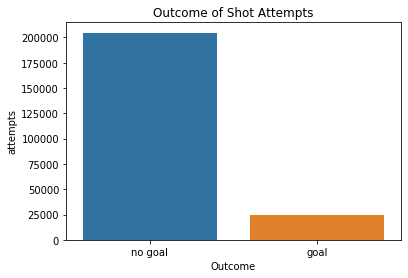

In [14]:
import seaborn as sns
total = []
for i in range(0,2):
    total.append(sum(data.is_goal == i))
ax = sns.barplot(['no goal','goal'],total)
ax.set(xlabel = 'Outcome', ylabel = 'attempts', title = 'Outcome of Shot Attempts');

In [15]:
total

[204694, 24441]

It turns out that only 10.67% of shot attempts end up becoming goals, only slightly better than 1 in 10.

The following are the top 10 teams in total goals.

In [16]:
team = df[['event_team','is_goal']].groupby('event_team').sum()
team.sort_values('is_goal', ascending = False).head(10)

,is_goal
event_team,
Barcelona,586
Real Madrid,573
Bayern Munich,453
Paris Saint-Germain,447
Napoli,403
Juventus,401
Borussia Dortmund,392
AS Roma,373
Lyon,355


The top 10 goalscorers are as follows, with Messi and Ronaldo at top.

In [17]:
player = df[['player','is_goal']].groupby('player').sum()
player.sort_values('is_goal', ascending = False).head(10)

,is_goal
player,
lionel messi,205
cristiano ronaldo,198
zlatan ibrahimovic,153
robert lewandowski,124
edinson cavani,121
gonzalo higuain,118
pierreemerick aubameyang,100
luis suarez,96
diego costa,93


Christiano Ronaldo is scoring the most header goals at 36.

In [18]:
head = df[df.bodypart==3]
player = head[['player','is_goal']].groupby('player').sum()
player.sort_values('is_goal', ascending = False).head(10)

,is_goal
player,
cristiano ronaldo,36
mario mandzukic,28
fernando llorente,25
olivier giroud,20
stefan kiessling,20
aritz aduriz,18
edinson cavani,18
andre ayew,17
zlatan ibrahimovic,17


## 5 Modeling

The data set is split into 2 parts, with 70% for training and 30% for testing.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.is_goal, test_size=0.3)

In [20]:
# check the train and test size
print(len(x_train),len(x_test),len(y_train),len(y_test))

160394 68741 160394 68741


### XGBoost

The following is to use the top gradient boosting algortihm XGBoost.

In [21]:
import xgboost as xgb

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [23]:
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
training_preds = clf.predict(x_train)
val_preds = clf.predict(x_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 90.99%
Validation accuracy: 91.15%


Both training and validation accuracy are around 91%, so this is a good model. There is no overfitting.

Next grid search can be used to find the optimal parameters.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(x_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(x_train)
val_preds = grid_clf.predict(x_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7

Training Accuracy: 91.02%
Validation accuracy: 91.18%


In [25]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

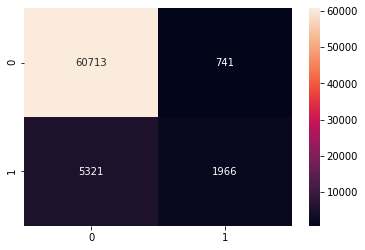

In [26]:
sns.heatmap(confusion_matrix(y_test, val_preds), annot=True, fmt='d');

In [27]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.73      0.27      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.82      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



The grid search improves validation accuracy slightly to 91.18%.

### Logistic Regression

In [28]:
lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

y_lr = lr_model.predict(x_test)

print("Validation accuracy: {:.4}%".format(accuracy_score(y_test,y_lr) * 100))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Validation accuracy: 91.19%


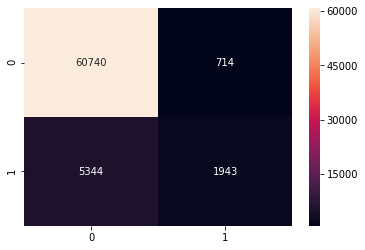

In [29]:
sns.heatmap(confusion_matrix(y_test,y_lr), annot=True, fmt='d');

In [30]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.73      0.27      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.83      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



In [31]:
pd.Series(lr_model.coef_[0], x_test.columns)

centre            0.214031
diff_long        -1.601125
diff_left        -0.830670
diff_right       -0.950767
left             -1.066823
left_6yard        0.607134
right            -1.050362
right_6yard       0.599992
very_close        2.014185
penalty           2.182601
outside_box      -1.834207
long_range       -2.121491
more_35yards     -2.482471
more_40yards     -1.633297
not_recorded      6.825826
right_foot       -0.135685
left_foot        -0.197591
head             -0.794168
assist_none      -0.322884
assist_pass      -0.271783
assist_cross     -0.684475
assist_head      -0.542304
assist_through    0.694001
open_play        -0.213572
set_piece         0.555449
corner            0.282159
free_kick        -1.751481
fast_break        1.691225
dtype: float64

### Gradient Boosting

In [32]:
gb_model = GradientBoostingClassifier()

gb_model.fit(x_train,y_train)

y_gb = gb_model.predict(x_test)

print("Validation accuracy: {:.4}%".format(accuracy_score(y_test,y_gb) * 100))

Validation accuracy: 91.16%


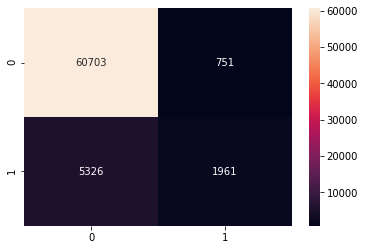

In [33]:
sns.heatmap(confusion_matrix(y_test,y_gb), annot=True, fmt='d');

In [34]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.72      0.27      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.82      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



### Random Forest

In [35]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

y_rf = rf_model.predict(x_test)

print("Validation accuracy: {:.4}%".format(accuracy_score(y_test,y_rf) * 100))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation accuracy: 91.15%


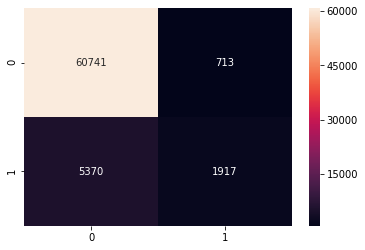

In [36]:
sns.heatmap(confusion_matrix(y_test,y_rf), annot=True, fmt='d');

In [37]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.73      0.26      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.82      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



### AdaBoost

In [38]:
ada_model = AdaBoostClassifier()

ada_model.fit(x_train,y_train)

y_ada = ada_model.predict(x_test)

print("Validation accuracy: {:.4}%".format(accuracy_score(y_test,y_ada) * 100))

Validation accuracy: 91.12%


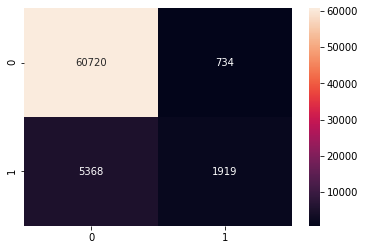

In [39]:
sns.heatmap(confusion_matrix(y_test,y_ada), annot=True, fmt='d');

In [40]:
print(classification_report(y_test,y_ada))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.72      0.26      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.82      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



All 5 algorithms have very close accuracy, ranging from 91.07% to 91.12%.

Lastly, a Multi-Layer Perception neural network model is built.

### Supervised Learning: Multi-Layer Perception

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function R^m -> R^n by training on a dataset, where m is the number of dimensions for input and n is the number of dimensions for output. 

Given a set of features x=x1,x2,...,xm and a target y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.

In [41]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='lbfgs')

mlp_model.fit(x_train,y_train)

y_mlp = mlp_model.predict(x_test)

print("Validation accuracy: {:.4}%".format(accuracy_score(y_test,y_mlp) * 100))

Validation accuracy: 91.18%


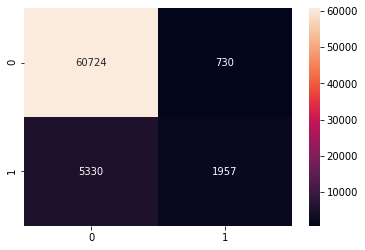

In [42]:
sns.heatmap(confusion_matrix(y_test,y_mlp), annot=True, fmt='d');

In [43]:
print(classification_report(y_test,y_mlp))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     61454
           1       0.73      0.27      0.39      7287

    accuracy                           0.91     68741
   macro avg       0.82      0.63      0.67     68741
weighted avg       0.90      0.91      0.89     68741



This has better results than the previous 5 algorithms.

Lastly, the expect goals probability (xG) will be calculated using this MLP model.

In [44]:
mlp_model.predict_proba(x_train)

array([[0.81464694, 0.18535306],
       [0.97168558, 0.02831442],
       [0.96558241, 0.03441759],
       ...,
       [0.97249687, 0.02750313],
       [0.97249687, 0.02750313],
       [0.97168558, 0.02831442]])

Here are 2 numbers, first one is the probability of not scoring, and the second one is the probability of scoring.

xG is the second number.

In [45]:
result = data
result ['xG'] = mlp_model.predict_proba(data.iloc[:,1:])[:,1]
result['difference'] = result['is_goal']-result['xG']
result

,is_goal,centre,diff_long,diff_left,diff_right,left,left_6yard,right,right_6yard,very_close,...,assist_cross,assist_head,assist_through,open_play,set_piece,corner,free_kick,fast_break,xG,difference
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.051012,-0.051012
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.027503,-0.027503
13,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.051012,0.948988
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.022255,-0.022255
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.022255,-0.022255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.022255,-0.022255
940991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.027503,-0.027503
940992,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.052377,-0.052377
940993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.027503,-0.027503


The final result obtained is the expected goal of every shot attempt.

In [46]:
result[['is_goal','xG','difference']]

,is_goal,xG,difference
0,0,0.051012,-0.051012
11,0,0.027503,-0.027503
13,1,0.051012,0.948988
14,0,0.022255,-0.022255
17,0,0.022255,-0.022255
...,...,...,...
940983,0,0.022255,-0.022255
940991,0,0.027503,-0.027503
940992,0,0.052377,-0.052377
940993,0,0.027503,-0.027503


## 6 Interpretation

The difference is calculated by subtracting xG from is_goal. It is a positive number if it is scoring a goal, negative number if the shot is not scoring.

With this in mind, a lot of interesting questions can be answered, with the Expected Goals model.

In [47]:
df = pd.concat([df,result[['xG','difference']]],axis=1)

Combine the result containing xG and difference back to the original data, a sample result is shown below.

In [48]:
df.iloc[78251]

id_odsp                                                  j7h8TOAt/
id_event                                                j7h8TOAt94
sort_order                                                      94
time                                                            90
text             Attempt missed. Robin van Persie (Manchester U...
event_type                                                       1
event_type2                                                     12
side                                                             2
event_team                                          Manchester Utd
opponent                                                Sunderland
player                                            robin van persie
player2                                           antonio valencia
player_in                                                      NaN
player_out                                                     NaN
shot_place                                                    

### Question 1: Which team has the most Expected Goals?

In [49]:
team = df[['event_team','is_goal','xG','difference']].groupby('event_team').sum()
team

,is_goal,xG,difference
event_team,,,
AC Ajaccio,114,115.341310,-1.341310
AC Milan,329,326.849687,2.150313
AJ Auxerre,46,47.825826,-1.825826
AS Monaco,233,199.634373,33.365627
AS Nancy Lorraine,88,99.605093,-11.605093
...,...,...,...
Villarreal,207,216.545613,-9.545613
Watford,65,64.978423,0.021577
Werder Bremen,254,263.998295,-9.998295


In [50]:
team.sort_values('xG', ascending = False).head(10)

,is_goal,xG,difference
event_team,,,
Barcelona,586,458.265267,127.734733
Real Madrid,573,455.694311,117.305689
Paris Saint-Germain,447,406.023766,40.976234
Juventus,401,383.242034,17.757966
Napoli,403,359.832190,43.167810
Bayern Munich,453,359.377261,93.622739
AS Roma,373,353.690893,19.309107
Sevilla,330,345.799682,-15.799682
Borussia Dortmund,392,338.536399,53.463601


The top 10 teams are coming from Spain(4), France(1), Germany(2), and Italy(3). 

Actually only 1 English team made it into top 35. This may be related to the style of playing.

It is not surprising to see that Real Madrid, Barcelona, PSG, Juventus and Bayern Munich coming into top 5. They have been dominant in their own countries, so it is expected they are creating lots of scoring chances in matches.

Sevilla is only top 10 team to have a negative difference however.

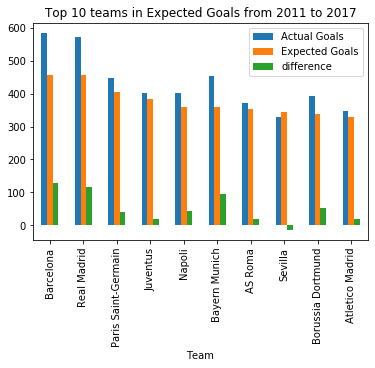

In [51]:
team.sort_values('xG', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 teams in Expected Goals from 2011 to 2017')
plt.xlabel('Team');

### Question 2: What team is best at converting chances?

The larger the difference is, the better the team is converting chances, i.e. they are scoring more than expected.

In [52]:
team.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
event_team,,,
Barcelona,586,458.265267,127.734733
Real Madrid,573,455.694311,117.305689
Bayern Munich,453,359.377261,93.622739
Borussia Dortmund,392,338.536399,53.463601
Napoli,403,359.832190,43.167810
Paris Saint-Germain,447,406.023766,40.976234
Lyon,355,317.844833,37.155167
AS Monaco,233,199.634373,33.365627
Borussia Monchengladbach,276,245.853605,30.146395


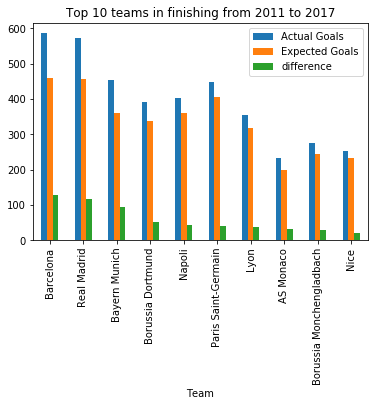

In [53]:
team.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 teams in finishing from 2011 to 2017')
plt.xlabel('Team');

Now Barcelona, Real Madrid and Bayern Munich are still the top 3.

Some of the top 10 teams are not as strong. It is interesting because it means they do not create as many chances, but they are better at converting to score.

Next, individual players performance are considered.

### Question 3: Which player has the most expected goals?

In [54]:
player = df[['player','is_goal','xG','difference']].groupby('player').sum()
player

,is_goal,xG,difference
player,,,
aaron,1,3.440445,-2.440445
aaron cresswell,4,3.400370,0.599630
aaron hughes,1,0.981105,0.018895
aaron hunt,25,26.408887,-1.408887
aaron lennon,8,5.338186,2.661814
...,...,...,...
zoltan stieber,6,5.571214,0.428786
zouhaier dhaouadhi,0,0.036890,-0.036890
zouhaier dhaouadi,1,0.332953,0.667047


In [55]:
player.sort_values('xG', ascending = False).head(10)

,is_goal,xG,difference
player,,,
cristiano ronaldo,198,165.674134,32.325866
lionel messi,205,146.458907,58.541093
zlatan ibrahimovic,153,120.393053,32.606947
edinson cavani,121,115.123010,5.876990
robert lewandowski,124,97.103345,26.896655
pierreemerick aubameyang,100,87.260931,12.739069
gonzalo higuain,118,86.094279,31.905721
antonio di natale,76,74.771418,1.228582
diego costa,93,73.286114,19.713886


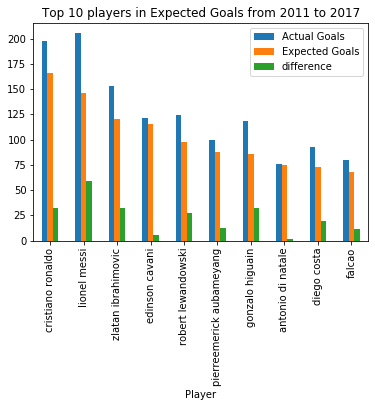

In [56]:
player.sort_values('xG', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 players in Expected Goals from 2011 to 2017')
plt.xlabel('Player');

The result is hardly surprising, with Christiano Ronaldo, Lionel Messi, and Zlatan Ibrahimovic as top 3.

The interesting thing is the difference value, while Ronaldo(166.4) has more xG than Messi(146.39), Messi has a much better conversion rate. This leads to the next question.

### Question 4: Which player is the best shooter for converting chances?

In [57]:
player.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
player,,,
lionel messi,205,146.458907,58.541093
zlatan ibrahimovic,153,120.393053,32.606947
cristiano ronaldo,198,165.674134,32.325866
gonzalo higuain,118,86.094279,31.905721
luis suarez,96,64.138889,31.861111
robert lewandowski,124,97.103345,26.896655
alexandre lacazette,88,62.648516,25.351484
karim benzema,85,62.865760,22.134240
alexis sanchez,80,58.065764,21.934236


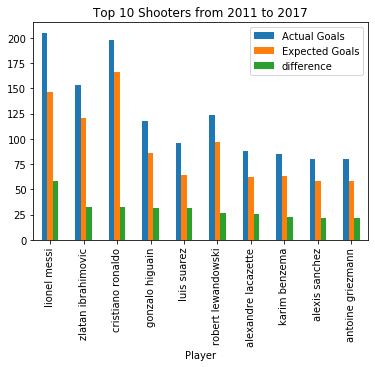

In [58]:
player.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 Shooters from 2011 to 2017')
plt.xlabel('Player');

Now Christiano Ronaldo only ranks 5th in this metric, with Messi at top and Ibrahimovic at second place.

### Question 5: Which player is the best at long range shots outside the box?

In [59]:
long = df[df.location==15]
player = long[['player','is_goal','xG','difference']].groupby('player').sum()
player.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
player,,,
lionel messi,16,6.395882,9.604118
paul pogba,14,5.917740,8.082260
gonzalo higuain,11,3.926795,7.073205
zlatan ibrahimovic,14,7.259816,6.740184
yaya toure,10,3.338277,6.661723
james rodriguez,9,2.415379,6.584621
blerim dzemaili,10,3.688963,6.311037
alexandre lacazette,9,3.060321,5.939679
sergio aguero,9,3.149826,5.850174


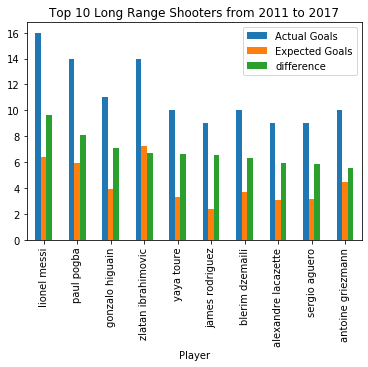

In [60]:
player.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 Long Range Shooters from 2011 to 2017')
plt.xlabel('Player');

Messi and Ibrahimovic are still 1st and 3rd.

Interestingly, some of these players are not forwards. Paul Pogba who comes in second, is a midfielder. Also for Yaya Toure and James Rodriguez at 5th and 6th.

### Question 6: Which player is the best at scoring headers?

In [61]:
head = df[df.bodypart==3]
player = head[['player','is_goal','xG','difference']].groupby('player').sum()
player.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
player,,,
cristiano ronaldo,36,19.486693,16.513307
mario mandzukic,28,13.887763,14.112237
fernando llorente,25,15.382565,9.617435
sloan privat,17,9.616431,7.383569
pierreemerick aubameyang,14,7.230872,6.769128
anthony modeste,17,10.605347,6.394653
olivier giroud,20,13.707737,6.292263
gareth bale,14,7.720140,6.279860
michail antonio,12,5.829981,6.170019


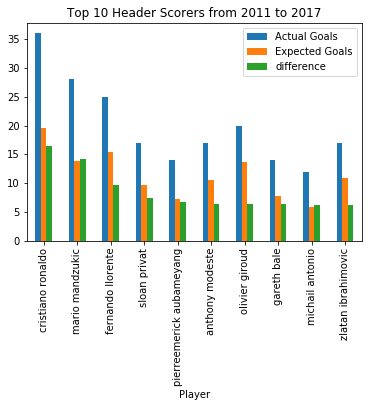

In [62]:
player.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 Header Scorers from 2011 to 2017')
plt.xlabel('Player');

Christiano Ronaldo is the best at headers, with a difference of +15.97, Mario Mandzukic is close second with +13.53. Bale and Ibrahimovic are also at 7th and 10th place.

Some of the players on the list are not as famous, such as Privat, Antonio and Modeste. Perhaps it is because they do not score a lot of goals overall.

### Question 7: Which player is best at scoring with left foot?

In [63]:
head = df[df.bodypart==2]
player = head[['player','is_goal','xG','difference']].groupby('player').sum()
player.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
player,,,
lionel messi,167,122.133199,44.866801
antoine griezmann,58,41.686189,16.313811
arjen robben,42,31.948964,10.051036
iago falque,23,13.260983,9.739017
franck ribery,16,6.544210,9.455790
mohamed salah,23,13.656136,9.343864
iago aspas,34,25.351683,8.648317
gareth bale,30,21.923285,8.076715
mauro icardi,17,9.508335,7.491665


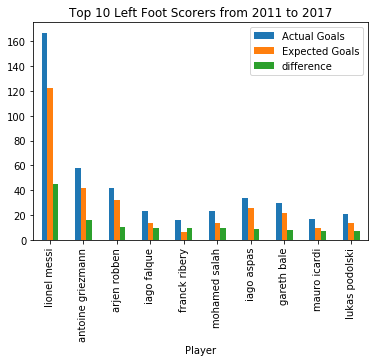

In [64]:
player.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 Left Foot Scorers from 2011 to 2017')
plt.xlabel('Player');

Messi is by far the best with a +44.72 difference, Griezmann comes in second with +16.55. Nobody else is greater than +10.

The duo at Bayern, Robben and Ribery is at 3rd and 5th.

### Question 8: Which player is best at scoring with right foot?

In [65]:
head = df[df.bodypart==1]
player = head[['player','is_goal','xG','difference']].groupby('player').sum()
player.sort_values('difference', ascending = False).head(10)

,is_goal,xG,difference
player,,,
luis suarez,69,43.273599,25.726401
gonzalo higuain,86,60.610731,25.389269
alexandre lacazette,70,48.410606,21.589394
zlatan ibrahimovic,111,91.876528,19.123472
robert lewandowski,84,65.574881,18.425119
alexis sanchez,62,45.277767,16.722233
karim benzema,54,38.914412,15.085588
eden hazard,50,35.532668,14.467332
carlos tevez,33,19.717380,13.282620


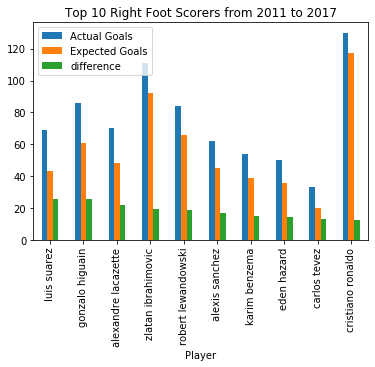

In [66]:
player.sort_values('difference', ascending = False).head(10).plot(kind='bar');
plt.legend(["Actual Goals","Expected Goals","difference"])
plt.title('Top 10 Right Foot Scorers from 2011 to 2017')
plt.xlabel('Player');

Luis Suarez is the best at +26, and Ronaldo barely made it to the top 10, at 10th.

## 7 Future Work

Here are some extensions that can be added to this project in the future.

- Include location of defensive players
- Calculate xG for goalkeepers
- Increase number of layers in neural network
- Use updated data for 2018 and 2019 seasons
- Calculate expected points for teams

## 8 Conclusion

Using these data analysis, an Expected Goals model is developed. It allows for comparision that which teams or players are the best at converting shot attempts.

Barcelona and Real Madrid are the top 2 teams at scoring.

Lionel Messi and Zlatan Ibrahimovic are the best shooters.

Lionel Messi is the best at left foot shots, by a very wide margin.

Christiano Ronaldo is the best at scoring headers.

The model confirms the facts which the players are known for.